<a href="https://colab.research.google.com/github/blackkite88/Image_Captioning/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os   # handling the files
import pickle # storing numpy features
import numpy as np
from tqdm.auto import tqdm # how much data is process till now

from tensorflow.keras.applications.vgg16 import VGG16 , preprocess_input # extract features from image data.
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input , Dense , LSTM , Embedding , Dropout , add

/Users/vivek001/Desktop/Image_Captioning/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
BASE_DIR = 'dataset'
WORKING_DIR = 'work'

In [ ]:
model = VGG16(weights=None)

weights_path = 'vgg16_weights_tf_dim_ordering_tf_kernels.h5'
if os.path.exists(weights_path):
    model.load_weights(weights_path)
else:
    raise FileNotFoundError(f"{weights_path} not found. Put the file in the notebook working directory or provide the full path.")

model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# extract features from image
features = {}
directory = os.path.join(BASE_DIR, 'images')

for img_name in tqdm(os.listdir(directory)):
    # load the image from file
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size=(224, 224))
    # convert image pixels to numpy array
    image = img_to_array(image)
    # reshape data for model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # preprocess image for vgg
    image = preprocess_input(image)
    # extract features
    feature = model.predict(image, verbose=0)
    # get image ID
    image_id = img_name.split('.')[0]
    # store feature
    features[image_id] = feature

100%|██████████| 8091/8091 [22:46<00:00,  5.92it/s]  


In [ ]:
# store features in pickle
pickle.dump(features, open(os.path.join(WORKING_DIR, 'features.pkl'), 'wb'))

In [ ]:
# load features from pickle
with open(os.path.join(WORKING_DIR, 'features.pkl'), 'rb') as f:
    features = pickle.load(f)

In [ ]:
with open(os.path.join(BASE_DIR, 'captions.txt'), 'r') as f:
    next(f)
    captions_doc = f.read()

In [ ]:
# create mapping of image to captions
mapping = {}
# process lines
for line in tqdm(captions_doc.split('\n')):
    # split the line by comma(,)
    tokens = line.split(',')
    if len(line) < 2:
        continue
    image_id, caption = tokens[0], tokens[1:]
    # remove extension from image ID
    image_id = image_id.split('.')[0]
    # convert caption list to string
    caption = " ".join(caption)
    # create list if needed
    if image_id not in mapping:
        mapping[image_id] = []
    # store the caption
    mapping[image_id].append(caption)

100%|██████████| 40456/40456 [00:00<00:00, 1549448.58it/s]


In [ ]:
len(mapping)

8091

In [ ]:
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            # take one caption at a time
            caption = captions[i]
            # preprocessing steps
            # convert to lowercase
            caption = caption.lower()
            # delete digits, special chars, etc.,
            caption = caption.replace('[^A-Za-z]', '')
            # delete additional spaces
            caption = caption.replace('\s+', ' ')
            # add start and end tags to the caption
            caption = 'startseq ' + " ".join([word for word in caption.split() if len(word)>1]) + ' endseq'
            captions[i] = caption

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/var/folders/5z/97tq0tcx191bytz3_0lkf5p80000gn/T/ipykernel_31177/822461702.py:12: SyntaxWarning: invalid escape sequence '\s'
  caption = caption.replace('\s+', ' ')


In [ ]:
# before preprocess of text
mapping['1000268201_693b08cb0e']

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [ ]:
# preprocess the text
clean(mapping)

In [ ]:
# after preprocess of text
mapping['1000268201_693b08cb0e']

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq']

In [ ]:
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [ ]:
len(all_captions)

40455

No. of unique captions stored

In [ ]:
all_captions[:10]

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq',
 'startseq black dog and spotted dog are fighting endseq',
 'startseq black dog and tri-colored dog playing with each other on the road endseq',
 'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
 'startseq two dogs of different breeds looking at each other on the road endseq',
 'startseq two dogs on pavement moving toward each other endseq']

In [ ]:
# tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
vocab_size

8485

In [ ]:
# get maximum length of the caption available
max_length = max(len(caption.split()) for caption in all_captions)
max_length

35

In [ ]:
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

In [ ]:
# create data generator to get data in batch (avoids session crash)
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    # loop over images
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            # process each caption
            for caption in captions:
                # encode the sequence
                seq = tokenizer.texts_to_sequences([caption])[0]
                # split the sequence into X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pairs
                    in_seq, out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # encode output sequence
                    out_seq = to_categorical([out_seq],num_classes=vocab_size)[0]
                    # store the sequences
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield [X1, X2], y
                X1, X2, y = list(), list(), list()
                n = 0

In [ ]:
# encoder model
# image feature layers
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# plot the model
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [ ]:
def create_pairs_from_caption_dict(captions_dict, tokenizer):
    pairs = []
    for img_id, caps in captions_dict.items():
        for cap in caps:
            seq = tokenizer.texts_to_sequences([cap])[0]
            # sliding-window: in_seq -> next_word
            for i in range(1, len(seq)):
                in_seq = seq[:i]
                out_word = int(seq[i])
                pairs.append((img_id, in_seq, out_word))
    return pairs

def normalize_mapping(mapping, features, tokenizer):
    """
    Return a list of (image_id, in_seq_tokens, out_word_idx)
    """
    normalized = []

    if isinstance(mapping, dict):
        # mapping: image_id -> [caption_str, ...]
        return create_pairs_from_caption_dict(mapping, tokenizer)

    # mapping is assumed iterable (list/tuple)
    for item in mapping:
        if not isinstance(item, (list, tuple)):
            continue

        if len(item) >= 3:
            # detect image_id by checking features keys
            image_id = None
            for cand in item:
                if cand in features:
                    image_id = cand
                    break
            if image_id is None:
                image_id = item[0]
            rest = [x for x in item if x is not image_id]
            in_seq = rest[0] if len(rest) > 0 else None
            out_word = rest[1] if len(rest) > 1 else None

        elif len(item) == 2:
            # try to detect image id
            if item[0] in features:
                image_id, in_seq = item[0], item[1]
                out_word = None
            elif item[1] in features:
                image_id, in_seq = item[1], item[0]
                out_word = None
            else:
                # assume (image_id, caption)
                image_id, in_seq = item[0], item[1]
                out_word = None
        else:
            continue

        # convert in_seq to token list if string
        if isinstance(in_seq, str):
            in_seq_tokens = tokenizer.texts_to_sequences([in_seq])[0]
        else:
            in_seq_tokens = list(in_seq) if in_seq is not None else []

        # convert out_word to int index if string
        if isinstance(out_word, str):
            out_idx = tokenizer.word_index.get(out_word)
            if out_idx is None:
                continue
        else:
            out_idx = int(out_word) if out_word is not None else None

        # If out_idx missing, skip (we expect mapping -> labeled pairs)
        if out_idx is None:
            continue

        normalized.append((image_id, in_seq_tokens, out_idx))

    return normalized

def data_generator(mapping, features, tokenizer, max_length, vocab_size, batch_size):
    """
    Yields ((X1, X2), y)
    - X1: (batch, feature_dim)   -- image features
    - X2: (batch, max_length)    -- input sequences (padded)
    - y : (batch, vocab_size)    -- one-hot next word
    """
    pairs = normalize_mapping(mapping, features, tokenizer)
    if len(pairs) == 0:
        raise ValueError("No training pairs generated. Check `mapping` and `features`.")

    N = len(pairs)
    idx = 0

    while True:
        X1_list, X2_list, y_list = [], [], []
        while len(X1_list) < batch_size:
            if idx >= N:
                idx = 0  # restart epoch (optionally shuffle pairs before loop)
            image_id, in_seq_tokens, out_idx = pairs[idx]
            idx += 1

            # skip if features missing for this image_id
            if image_id not in features:
                continue

            # ensure photo is 1-D vector: (feature_dim,)
            photo = np.asarray(features[image_id], dtype=np.float32)
            photo = np.squeeze(photo)           # remove singleton dims
            if photo.ndim != 1:
                photo = photo.reshape(-1)       # flatten any remaining dims
            assert photo.ndim == 1, f"photo must be 1-D, got {photo.shape}"

            # pad/truncate in_seq to max_length
            seq_arr = np.zeros((max_length,), dtype=np.int32)
            if in_seq_tokens:
                l = min(len(in_seq_tokens), max_length)
                seq_arr[:l] = np.asarray(in_seq_tokens[:l], dtype=np.int32)

            y_onehot = to_categorical(out_idx, num_classes=vocab_size)

            X1_list.append(photo)
            X2_list.append(seq_arr)
            y_list.append(y_onehot)

        X1_arr = np.asarray(X1_list, dtype=np.float32)   # (batch, feature_dim)
        X2_arr = np.asarray(X2_list, dtype=np.int32)     # (batch, max_length)
        y_arr  = np.asarray(y_list, dtype=np.float32)    # (batch, vocab_size)

        # Yield a tuple of inputs (not a list) — compatible with model.fit
        yield (X1_arr, X2_arr), y_arr


In [ ]:
# training loop (exactly like you had)
epochs = 20
batch_size = 32

# compute normalized pairs once to get correct steps
_pairs = normalize_mapping(mapping, features, tokenizer)
steps = max(1, len(_pairs) // batch_size)

for epoch in range(epochs):
    gen = data_generator(mapping, features, tokenizer, max_length, vocab_size, batch_size)
    model.fit(gen, epochs=1, steps_per_epoch=steps, verbose=1)


13005/13005 ━━━━━━━━━━━━━━━━━━━━ 725s 56ms/step - loss: 4.5882
13005/13005 ━━━━━━━━━━━━━━━━━━━━ 766s 59ms/step - loss: 3.9383
13005/13005 ━━━━━━━━━━━━━━━━━━━━ 813s 62ms/step - loss: 3.7464
13005/13005 ━━━━━━━━━━━━━━━━━━━━ 808s 62ms/step - loss: 3.6306
13005/13005 ━━━━━━━━━━━━━━━━━━━━ 819s 63ms/step - loss: 3.5546
13005/13005 ━━━━━━━━━━━━━━━━━━━━ 843s 65ms/step - loss: 3.5075
13005/13005 ━━━━━━━━━━━━━━━━━━━━ 823s 63ms/step - loss: 3.4759
13005/13005 ━━━━━━━━━━━━━━━━━━━━ 836s 64ms/step - loss: 3.4503
13005/13005 ━━━━━━━━━━━━━━━━━━━━ 826s 64ms/step - loss: 3.4379
13005/13005 ━━━━━━━━━━━━━━━━━━━━ 855s 66ms/step - loss: 3.4264
13005/13005 ━━━━━━━━━━━━━━━━━━━━ 993s 76ms/step - loss: 3.4153
13005/13005 ━━━━━━━━━━━━━━━━━━━━ 1042s 80ms/step - loss: 3.5346
13005/13005 ━━━━━━━━━━━━━━━━━━━━ 996s 77ms/step - loss: 3.4114
13005/13005 ━━━━━━━━━━━━━━━━━━━━ 1004s 77ms/step - loss: 3.4014
13005/13005 ━━━━━━━━━━━━━━━━━━━━ 1025s 79ms/step - loss: 3.3966
13005/13005 ━━━━━━━━━━━━━━━━━━━━ 1005s 77ms/step - l

In [ ]:
# save the model
model.save(WORKING_DIR+'/best_model.h5')

In [ ]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [ ]:
# generate caption for an image
def predict_caption(model, image, tokenizer, max_length):
    # add start tag for generation process
    in_text = 'startseq'
    # iterate over the max length of sequence
    for i in range(max_length):
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], max_length)
        # predict next word
        yhat = model.predict([image, sequence], verbose=0)
        # get index with high probability
        yhat = np.argmax(yhat)
        # convert index to word
        word = idx_to_word(yhat, tokenizer)
        # stop if word not found
        if word is None:
            break
        # append word as input for generating next word
        in_text += " " + word
        # stop if we reach end tag
        if word == 'endseq':
            break
    return in_text

In [ ]:
from nltk.translate.bleu_score import corpus_bleu
# validate with test data
actual, predicted = list(), list()

for key in tqdm(test):
    # get actual caption
    captions = mapping[key]
    # predict the caption for image
    y_pred = predict_caption(model, features[key], tokenizer, max_length)
    # split into words
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # append to the list
    actual.append(actual_captions)
    predicted.append(y_pred)
# calcuate BLEU score
print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))


100%|██████████| 810/810 [06:05<00:00,  2.22it/s]

BLEU-1: 0.390196
BLEU-2: 0.138051


## Visualize the Results

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):
    # load the image
    # image_name = "1001773457_577c3a7d70.jpg"
    image_id = image_name.split('.')[0]
    img_path = os.path.join(BASE_DIR, "Images", image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption)
    # predict the caption
    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)

---------------------Actual---------------------
startseq black dog and spotted dog are fighting endseq
startseq black dog and tri-colored dog playing with each other on the road endseq
startseq black dog and white dog with brown spots are staring at each other in the street endseq
startseq two dogs of different breeds looking at each other on the road endseq
startseq two dogs on pavement moving toward each other endseq
--------------------Predicted--------------------
startseq two men are standing on the street with two men in black and one woman endseq


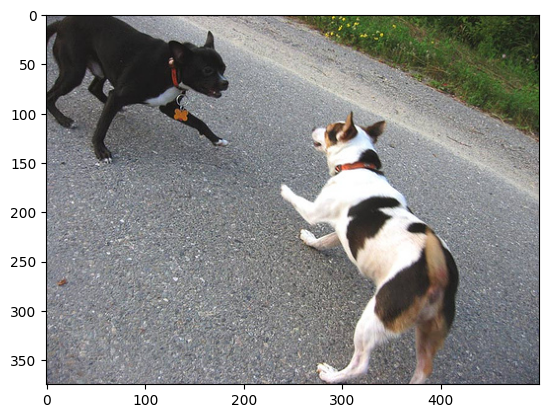

In [ ]:
generate_caption("1001773457_577c3a7d70.jpg")

---------------------Actual---------------------
startseq little girl covered in paint sits in front of painted rainbow with her hands in bowl endseq
startseq little girl is sitting in front of large painted rainbow endseq
startseq small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it endseq
startseq there is girl with pigtails sitting in front of rainbow painting endseq
startseq young girl with pigtails painting outside in the grass endseq
--------------------Predicted--------------------
startseq two men are standing on the street with two men in black and one woman endseq


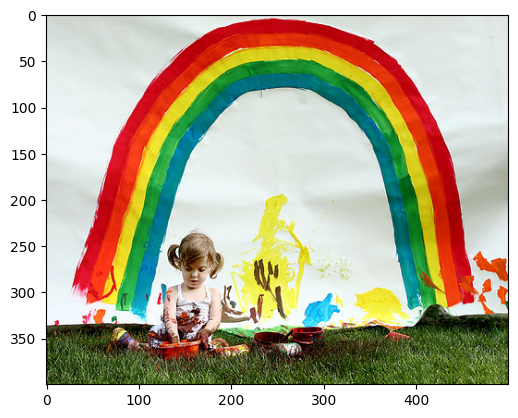

In [ ]:
generate_caption("1002674143_1b742ab4b8.jpg")

---------------------Actual---------------------
startseq man in hat is displaying pictures next to skier in blue hat endseq
startseq man skis past another man displaying paintings in the snow endseq
startseq person wearing skis looking at framed pictures set up in the snow endseq
startseq skier looks at framed pictures in the snow next to trees endseq
startseq man on skis looking at artwork for sale in the snow endseq
--------------------Predicted--------------------
startseq two men are standing on the street with two men in black and one woman endseq


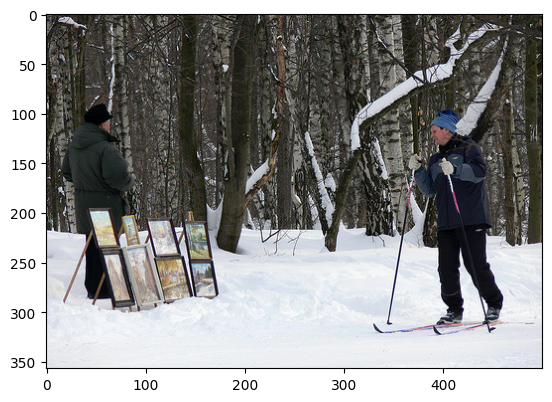

In [ ]:
generate_caption("101669240_b2d3e7f17b.jpg")